In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn import model_selection

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
from keras.models import Sequential


In [10]:
import keras 

In [11]:
from keras.models import Sequential


In [12]:
from keras.layers import Dense

In [13]:
from keras.layers import LSTM

In [14]:
from keras.layers import Dropout


In [15]:
df = pd.read_csv("NFLX.csv")

In [16]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
6,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
7,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
8,2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
9,2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800


# Training And Testing Of Data

In [17]:
df.shape

(5044, 7)

In [18]:
df1_train = df.reset_index()['Close']

In [19]:
df1_train.head()

0    1.196429
1    1.210000
2    1.157143
3    1.103571
4    1.071429
Name: Close, dtype: float64

In [20]:
df1_train.shape

(5044,)

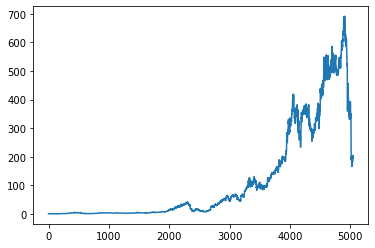

In [21]:
plt.plot(df1_train)

# Scalling the data to make it fit

In [22]:
sc = MinMaxScaler(feature_range = (0,1))


In [23]:
df1_train = sc.fit_transform(np.array(df1_train).reshape(-1,1))

In [24]:
df1_train

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.2785077 ],
       [0.29612623],
       [0.28728803]])

# train-test split using cross validation 

In [25]:
train_size = int(len(df1_train)*0.65)
test_size = len(df1_train)-train_size
train_data=df1_train[0:train_size,:]
test_data = df1_train[train_size:len(df1_train),:1]


In [26]:
train_size, test_size

(3278, 1766)

# data preprocessing

In [27]:
import numpy
def create_ds(dataset, time_step=1):
    x,y = [], []
    for i in range(len(dataset)-time_step-1):
        #i = 0...100
        a = dataset[i:(i+time_step), 0]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return numpy.array(x), numpy.array(y)

In [28]:
time_step = 100
x_train, y_train = create_ds(train_data, time_step)
x_test, y_test = create_ds(test_data, time_step)


In [29]:
print(x_train.shape), print(y_train.shape)

(3177, 100)
(3177,)


(None, None)

In [30]:
print(x_test.shape), print(y_test.shape)

(1665, 100)
(1665,)


(None, None)

# reshape input to be (samples, time_steps, features) which is rquired for LSTM

In [31]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)


# lstm model building


In [32]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (100,1)))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(LSTM(units = 50))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [33]:
algo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
algo.fit(x_train, y_train, validation_data = (x_test,y_test),epochs = 50, batch_size =64, verbose = 1)

Epoch 1/50
50/50 [==============================] - 39s 489ms/step - loss: 1.5470e-04 - val_loss: 0.0021
Epoch 2/50
50/50 [==============================] - 20s 411ms/step - loss: 1.4106e-05 - val_loss: 0.0018
Epoch 3/50
50/50 [==============================] - 21s 415ms/step - loss: 1.3186e-05 - val_loss: 0.0017
Epoch 4/50
50/50 [==============================] - 20s 406ms/step - loss: 1.1433e-05 - val_loss: 0.0016
Epoch 5/50
50/50 [==============================] - 20s 407ms/step - loss: 1.1236e-05 - val_loss: 0.0015
Epoch 6/50
50/50 [==============================] - 20s 408ms/step - loss: 1.0474e-05 - val_loss: 0.0020
Epoch 7/50
50/50 [==============================] - 20s 406ms/step - loss: 9.5337e-06 - val_loss: 0.0012
Epoch 8/50
50/50 [==============================] - 20s 407ms/step - loss: 9.4103e-06 - val_loss: 0.0012
Epoch 9/50
50/50 [==============================] - 21s 412ms/step - loss: 8.8242e-06 - val_loss: 0.0011
Epoch 10/50
50/50 [==============================] - 20

# prediction

In [35]:
train_pred=algo.predict(x_train)
test_pred=algo.predict(x_test)

# transform back to original form

In [36]:
train_pred = sc.inverse_transform(train_pred)
test_pred = sc.inverse_transform(test_pred)

# calculate RMSE perfomance metric

In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

25.207361289156083

In [38]:
#test data RMSE
math.sqrt(mean_squared_error(y_test,test_pred))


347.79988446536777

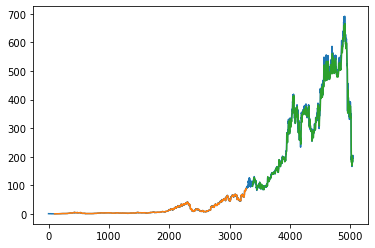

In [39]:
look_back = 100
trainpredictplot = numpy.empty_like(df1_train)
trainpredictplot[:, :] = np.nan
trainpredictplot[look_back:len(train_pred)+ look_back, :] = train_pred
#shift test prediction for plotting
testpredictplot = numpy.empty_like(df1_train)
testpredictplot[:, :] = np.nan
testpredictplot[len(train_pred)+ (look_back*2)+1:len(df1_train)-1, :] = test_pred
#plot baseline and prediction
plt.plot(sc.inverse_transform(df1_train))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [40]:
len(test_data)

1766

In [41]:
x_input = test_data[1666:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [43]:
from numpy import array

list_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = algo.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = algo.predict(x_input, verbose =0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        list_output.extend(yhat.tolist())
        i=i+1
        
print(list_output)

[0.2880266]
101
1 day input [0.77655692 0.7504908  0.75987866 0.73834004 0.7456594  0.73465145
 0.57445001 0.55947858 0.52949237 0.5197718  0.55882768 0.5554428
 0.61732471 0.66070566 0.62070955 0.58616679 0.59277737 0.58110399
 0.58317249 0.59671189 0.58713593 0.56549609 0.57310477 0.58885728
 0.57528897 0.55878428 0.56546717 0.54534616 0.53099672 0.56364455
 0.56475835 0.57013939 0.55816225 0.54917941 0.53187911 0.52270822
 0.5061167  0.49382133 0.51845547 0.51553348 0.49173835 0.4782713
 0.49669988 0.51663284 0.53669599 0.55000393 0.54131037 0.55335986
 0.54116571 0.54293046 0.54023996 0.54698072 0.56623382 0.55126239
 0.54131037 0.53969028 0.56577093 0.54935298 0.53228414 0.52331573
 0.5142461  0.50284756 0.49720617 0.50636258 0.49291002 0.48817989
 0.50372992 0.32664768 0.31511897 0.31121338 0.30309844 0.28644905
 0.27218642 0.28806916 0.27481908 0.28798237 0.28857542 0.29456399
 0.2718682  0.26123632 0.24985226 0.25644836 0.2401172  0.25160253
 0.27088456 0.26925    0.27510838 0.

In [44]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1_train)-100

4944

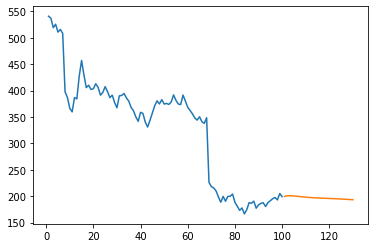

In [47]:
plt.plot(day_new, sc.inverse_transform(df1_train[4944:]))
plt.plot(day_pred, sc.inverse_transform(list_output))

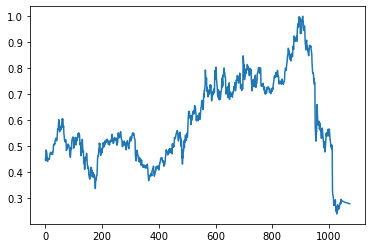

In [48]:
df3 = df1_train.tolist()
df3.extend(list_output)
plt.plot(df3[4000:])

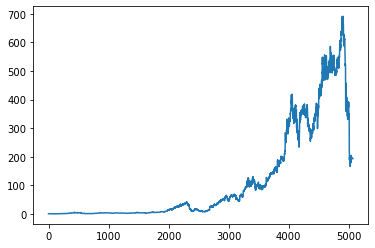

In [49]:
df3 = sc.inverse_transform(df3).tolist()
plt.plot(df3)


# This way we can predict the future stock prices